# Analyze Traffic Safety Data with Python

`Visualize traffic safety data and analyze the relationship between collisions and smartphone usage over time`

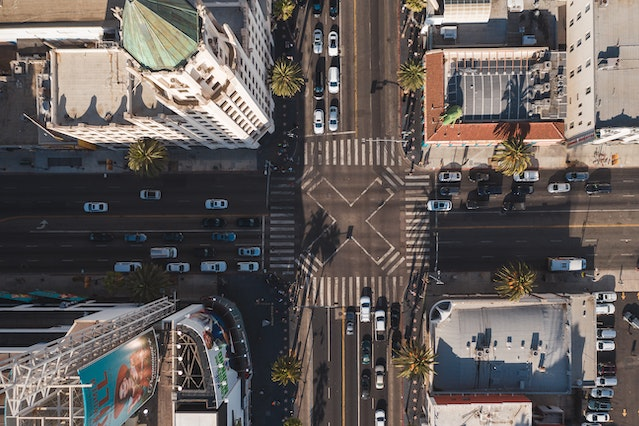

**To investigate trends in traffic safety, we can:**

* Visualize trends in car crashes over time
* Plot changes in key variables like smartphone use
* Assess the correlation of each variable with collision rates
* Predict collision rates 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from sklearn.linear_model import LinearRegression

sns.set_theme()
sns.set_palette('colorblind')

In [2]:
traffic_data = pd.read_csv("traffic.csv")

In [3]:
traffic_data.head()

,Date,Crashes_per_100k,Season
0,2006-01-01,169.176541,Winter
1,2006-02-01,154.028836,Winter
2,2006-03-01,159.930002,Spring
3,2006-04-01,155.741270,Spring
4,2006-05-01,168.179208,Spring


## Inspect and format data types


The traffic data frame contains three columns: Date, Crashes_per_100k, and Season. In order to plot the Crashes_per_100k as a time series, we need to make sure that the Date column is in date format. Inspect the data types in the data frame, convert the Date column to date format, and inspect the data types a second time.

In [5]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              180 non-null    object 
 1   Crashes_per_100k  180 non-null    float64
 2   Season            180 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


**Convert the Date column to the date datatype using the pd.to_datatime(column) function.**

In [6]:
# convert Date to date format
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'])

# inspect data types
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              180 non-null    datetime64[ns]
 1   Crashes_per_100k  180 non-null    float64       
 2   Season            180 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB


<font color='red'>By using the pd.to_datetime() function, we converted a character string object to the datetime64[ns] datatype. This will allow us to plot a time series of data points.</font>

## Visualize traffic safety data

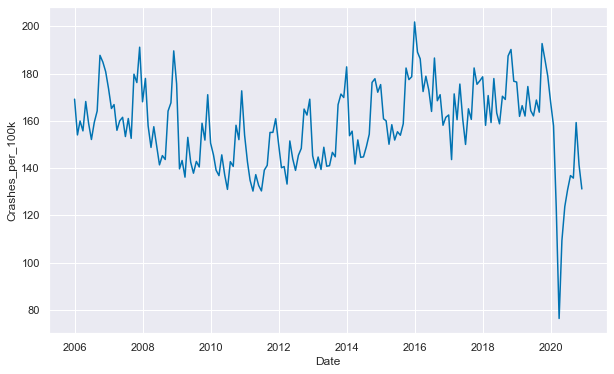

In [7]:
# create line plot
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Date', y = 'Crashes_per_100k', data = traffic_data)
plt.show();

<font color='red'>Looking at the line plot of our collision data, we can see the decreasing trend in crash rates from 2006 continuing until 2010 or 2011, and then crash rates begin increasing. The data for 2020 is very different from the preceding years.</font>

## Visualize seasonal rates

Since we saw a fair amount of variance in the number of collisions occurring throughout the year, we might hypothesize that the number of collisions increases or decreases during different seasons. We can visually explore this with a box plot.

In [9]:
traffic_data[traffic_data.Date.dt.year ==2020]

,Date,Crashes_per_100k,Season
168,2020-01-01,167.819316,Winter
169,2020-02-01,157.889550,Winter
170,2020-03-01,123.519761,Spring
171,2020-04-01,76.307471,Spring
172,2020-05-01,109.332431,Spring
173,2020-06-01,123.688509,Summer
174,2020-07-01,130.800233,Summer
175,2020-08-01,136.815697,Summer
176,2020-09-01,135.752824,Fall
177,2020-10-01,159.273228,Fall


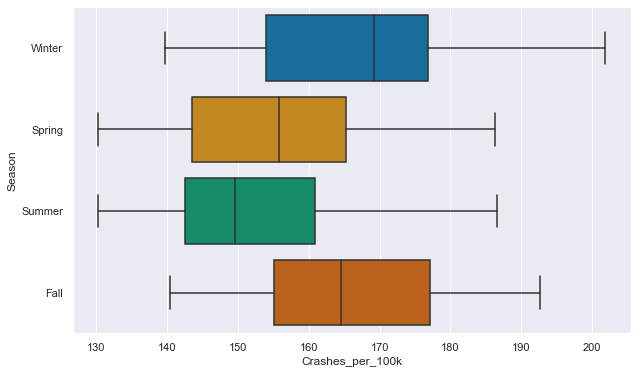

In [10]:
# create box plot by season
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Crashes_per_100k', y = 'Season', data = traffic_data[traffic_data.Date.dt.year != 2020])
plt.show()

<font color='red'>Winter and Fall appear to have generally higher crash rates than Spring and Summer. Seasons may be the reason for the pattern in crash rates.</font>

# Inspect the smartphone use dataset

`The dataset crashes_smartphones.csv contains smartphone data from Pew Research Center matched to normalized crash rates from the traffic data frame for the years 2011 to 2019.`

In [11]:
# import dataset
smartphones = pd.read_csv('crashes_smartphones.csv')

# inspect first few rows
smartphones.head()

,Month_Year,Crashes_per_100k,Season,Smartphone_Survey_Date,Smartphone_usage
0,Apr-12,133.213685,Spring,4/3/12,46
1,Apr-15,150.077792,Spring,4/12/15,67
2,Apr-16,172.401948,Spring,4/4/16,72
3,Aug-12,145.403147,Summer,8/5/12,44
4,Dec-12,169.160811,Winter,12/9/12,45


**Similar to the traffic data frame, the smartphones data frame has a date column that is not properly formatted. Convert the Smartphone_Survey_Date column to the date data type using the pd.to_datetime() function and then inspect the data types in the data fram**

In [12]:
# change to datetime object
smartphones['Smartphone_Survey_Date'] = pd.to_datetime(smartphones['Smartphone_Survey_Date'])

# inspect data types
smartphones.info()

2023-10-12 23:47:30,846 [6308] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-12-4fa960c4546e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  smartphones['Smartphone_Survey_Date'] = pd.to_datetime(smartphones['Smartphone_Survey_Date'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Month_Year              28 non-null     object        
 1   Crashes_per_100k        28 non-null     float64       
 2   Season                  28 non-null     object        
 3   Smartphone_Survey_Date  28 non-null     datetime64[ns]
 4   Smartphone_usage        28 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.2+ KB


<font color='red'>There is a lot less data available for smartphone usage rates than there was for crash rates. The smartphones dataframe consists of 5 columns and 28 rows. Luckily, there are no missing data to contend with.</font>

## Visualize smartphone use data

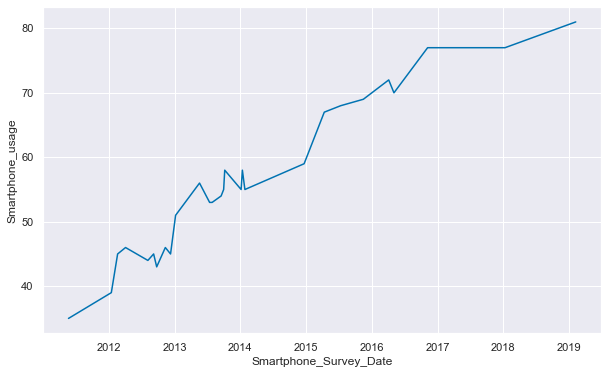

In [13]:
# create line plot
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Smartphone_Survey_Date', y = 'Smartphone_usage', data = smartphones)
plt.show()

<font color='red'>We can see a trend of smartphone usage increasing over time.</font>

## Visualize crash rate by smartphone use

`A scatter plot with smartphone usage on one axis and crash rates on the other axis will give us an idea of whether there is a relationship between these two variables.`

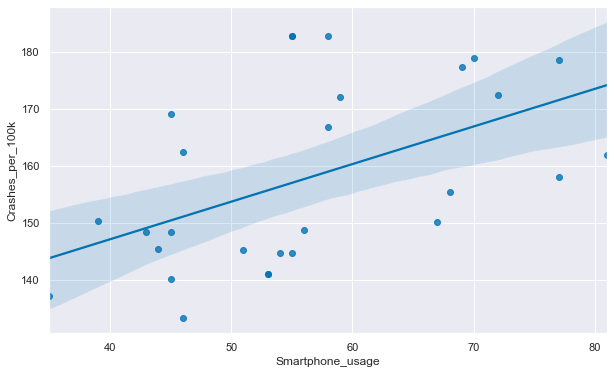

In [14]:
# create scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x = 'Smartphone_usage', y = 'Crashes_per_100k', data = smartphones)
plt.show()

<font color='red'>There appears to be a positive linear relationship between the rate of car crashes and the rate of adult smartphone usage in the U.S.</font>

##  Check the correlation coefficient

* To test whether the correlation between Smartphone_usage and Crashes_per_100k is statistically significant, we can calculate the Pearson's r correlation coefficient and the associated p-value.

* Use corr, p = pearsonr(column1, column2) on the Smartphone_usage and Crashes_per_100k columns in the smartphones dataframe. Then use the provided code to print corr and p to see the results.

In [15]:
# find Pearson's r and p-value
corr, p = stats.pearsonr(smartphones.Smartphone_usage, smartphones.Crashes_per_100k)

# print corr and p
print("Pearson's r =",  round(corr,3))
print("p = ", round(p,3))

Pearson's r = 0.513
p =  0.005


<font color='red'>The Pearson's r correlation coefficient is greater than 0.5, which indicates a moderately strong positive relationship. The p-value is less than 0.05. Together, this tells us that there is a statistically significant correlation between adult smartphone usage rates and car crash rates in the U.S. We have to be careful though: correlation does not mean causation, as the saying goes. Many other factors may be contributing to the rise in car crash rates from 2011 to 2019.</font>

# Analysis

## <font color='blue'>Run a linear regression</font>

In [16]:
# convert columns to arrays
X = smartphones['Smartphone_usage'].to_numpy().reshape(-1, 1)
y = smartphones['Crashes_per_100k'].to_numpy().reshape(-1, 1)

In [17]:
#initiate the linear regression model
lm = LinearRegression()

#fit the model
lm.fit(X, y)

LinearRegression()

###  Print and interpret regression coefficients

In [18]:
# print the coefficients 
print("Coefficients: \n",lm.intercept_, lm.coef_)

Coefficients: 
 [120.6637106] [[0.66103316]]


<font color='red'>The generic equation for a line is y = b + (m * x), where b is the value where the the line intercepts the y-axis and m is the slope of the line. In this step, we learned the two coefficients of our linear model, b = 120.6637 and m = 0.6610. So the equation for our linear model is y = 120.6637 + (0.6610 * x) and we can use this equation to predict new values of y from any new value of x.

We can also interpret the slope of 0.6610: every additional percentage point of smartphone usage is associated with an additional 0.6610 crashes per 100,000 people.</font>

### Make a prediction

In [19]:
# get the smartphone usage rate from 2019
smartphones[smartphones['Month_Year'] == "Feb-19"].Smartphone_usage

7    81
Name: Smartphone_usage, dtype: int64

In [20]:
# predict the crash rate in 2020 using the regression equation
120.664 + (0.661 * 81)

174.205

<font color='red'>If the smartphone usage rate was the same in 2020 as in 2019 (81%), our model predicts that the crash rate in 2020 would be 174.205 crashes per 100,000 people.</font>

###  Compare to the actual rate

In [22]:
# get the actual crash rate in Feb 2020
traffic_data[traffic_data['Date'] == pd.to_datetime("2020-02-01")].Crashes_per_100k

169    157.88955
Name: Crashes_per_100k, dtype: float64

<font color='red'>The actual crash rate in Februrary of 2020 was only 157.8895, which was a fair bit lower than our prediction.</font>

## Visualize the prediction

Let's plot our regression plot again, but let's add two new points on top:

* The predicted 2020 crash rate
* The actual 2020 crash rate

Code has been provided for the original regression plot and a legend title.

Add a scatter plot layer to add the 2020 predicted and actual crash rates that both used the 2019 smartphone usage rate. Use different colors and marker shapes for the predicted and actual 2020 crash rates.

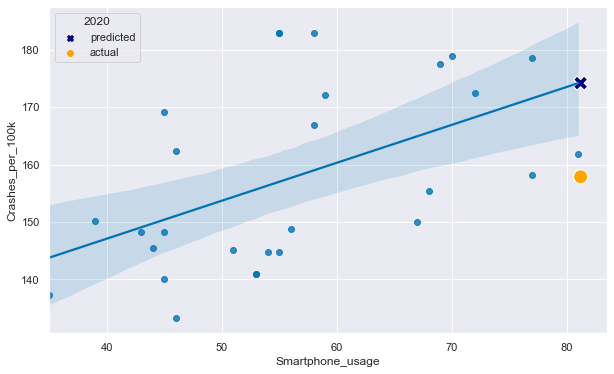

In [28]:
# recreate the regression plot we made earlier
plt.figure(figsize=(10,6))
sns.regplot(x = 'Smartphone_usage', y = 'Crashes_per_100k', data = smartphones)


# add a scatter plot layer to show the actual and predicted 2020 values
sns.scatterplot(x = [81.2,81.2], y = [174.205,157.890], 
                hue = ['predicted','actual'], style= ['predicted','actual'], 
                markers = ['X','o'], palette=['navy','orange'], s=200)

# add legend title
plt.legend(title='2020')
plt.show()

<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>What did we discover in this step? Toggle to check!</i></summary>

By adding another layer to our regression plot, we can see the difference between the predicted and real crash rates in February 2020. This allows us to see how these values compare to the rest of the dataset. 

</details>